In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import math

In [2]:
vid_folder = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/Cropped_vids'

vids_gc1 = []
vids_ngc1 = []

for file in os.listdir(vid_folder):
    if file.endswith('.mp4'):
        x = file.split('DLC')[0]
        print(x)
        if x.endswith('downsampled'):
            vids_ngc1.append(file)
        elif x.endswith('_GC'):
            vids_gc1.append(file)

AAACrpoutput_videovin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GC
AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
AAACrpoutput_videovin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
AAACrpoutput_videonil_20210614_XBI19_GC
AAACrpoutput_videonil_20210614_XBI19downsampled
AAACrpoutput_videovin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videovin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_camera_GC
AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_

In [3]:
vids_gc = sorted(vids_gc1)
vids_ngc = sorted(vids_ngc1)

In [4]:
primary_name = []
for i in range(len(vids_gc)):
    x = vids_gc[i].split('DLC')[0]
    y = vids_ngc[i].split('DLC')[0]
    print(x)
    print(y)
    if y.endswith('downsampled'):
        y1 = y[:-len('downsampled')]
    if x.endswith('_GC'):
        x1 = x[:-len('_GC')]
    if x1==y1:
        print("yay")
        primary_name.append(x1)
    else:
        print("nay")

AAACrpoutput_videoken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videonil_20210614

In [5]:
primary_name

['AAACrpoutput_videoken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videonil_20210614_XBI19',
 'AAACrpoutput_videovin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videovin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videovin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videovin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera',
 'AAACrpoutput_videovin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_camera']

In [6]:
gc_stats = []
for file in vids_gc:
    origin = os.path.join(vid_folder, file)
    cur_vid = cv2.VideoCapture(origin)
    frames = cur_vid.get(cv2.CAP_PROP_FRAME_COUNT)
    gc_stats.append(frames)
    # print(file)
    
# print('')
ngc_stats = []
for file in vids_ngc:
    origin = os.path.join(vid_folder, file)
    cur_vid = cv2.VideoCapture(origin)
    frames = cur_vid.get(cv2.CAP_PROP_FRAME_COUNT)
    ngc_stats.append(frames)
    # print(file)

In [7]:
diff = []
for i in range(len(gc_stats)):
    d = gc_stats[i] - ngc_stats[i]
    diff.append(d)

In [8]:
pth = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/Videos'
files = []
for i in os.listdir(pth):
    files.append(os.path.join(pth, i))
sorted(files)
total_frames = []
for i in files:
    capa = cv2.VideoCapture(i)
    tot_frames = int(capa.get(cv2.CAP_PROP_FRAME_COUNT))
    total_frames.append(tot_frames)
    capa.release()
total_frames

[444463,
 232403,
 61703,
 187038,
 477251,
 150166,
 100730,
 54569,
 162229,
 109067,
 107336]

In [9]:
prn = []
for i in primary_name:
    prn.append(i.split('video')[1].split('_XBI')[0])

In [10]:
gc_stats = np.array(gc_stats)
ngc_stats = np.array(ngc_stats)
total_frames = np.array(total_frames)
per_gc = np.around(gc_stats/total_frames*100, 2)
per_ngc = np.around(ngc_stats/total_frames*100, 2)




stats_list = np.array([prn, total_frames, gc_stats, per_gc, ngc_stats, per_ngc, diff]).T
stats = pd.DataFrame(stats_list)
stats.columns = ('File Name', 'Total Frames', 'With Gamma Correction', 'Percent frames in GC', 'Sans Gamma Correction', 'Percent frames in sGC', 'Difference in frame count')
stats

,File Name,Total Frames,With Gamma Correction,Percent frames in GC,Sans Gamma Correction,Percent frames in sGC,Difference in frame count
0,ken_20210503_0911,444463,4519.0,1.02,3280.0,0.74,1239.0
1,ken_20210504_1236,232403,11948.0,5.14,8633.0,3.71,3315.0
2,ken_20210505_0939,61703,1918.0,3.11,1575.0,2.55,343.0
3,ken_20210506,187038,12020.0,6.43,9549.0,5.11,2471.0
4,ken_20210507_1032,477251,21774.0,4.56,15071.0,3.16,6703.0
5,nil_20210614,150166,1057.0,0.7,513.0,0.34,544.0
6,vin_20210525_0844,100730,4920.0,4.88,3157.0,3.13,1763.0
7,vin_20210526_1022,54569,27882.0,51.09,20761.0,38.05,7121.0
8,vin_20210527_1010,162229,14545.0,8.97,3183.0,1.96,11362.0
9,vin_20210528_1002,109067,7173.0,6.58,7052.0,6.47,121.0


In [12]:
file_to_save = '/home/yramakrishna/DeepLabCut/conda-environments/Frame_Statistics.csv'
# open the file in the write mode
f = open(file_to_save, 'w')

# write a row to the csv file
stats.to_csv(file_to_save)

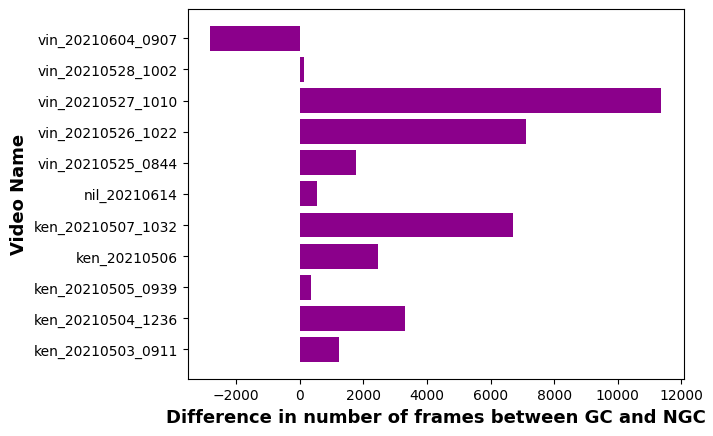

In [11]:
plt.barh(prn, diff, color = 'DarkMagenta')
# plt.show()
font = {'weight' : 'bold',
        'size'   : 13}
plt.xlabel('Difference in number of frames between GC and NGC', **font)
plt.ylabel('Video Name', **font)
plt.savefig('Frame_recog_comparison-GC_vs_NGC.png')

In [12]:
fl_name = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frame_Ids.csv'
fileframe = pd.read_csv(fl_name, header = [0])
fileframe

,File_name,framesIDS
0,/home/yramakrishna/DeepLabCut/conda-environmen...,"[395, 396, 397, 398, 399, 400, 401, 402, 406, ..."
1,/home/yramakrishna/DeepLabCut/conda-environmen...,"[529, 530, 531, 532, 533, 534, 535, 536, 537, ..."
2,/home/yramakrishna/DeepLabCut/conda-environmen...,"[524, 525, 569, 570, 571, 572, 573, 574, 575, ..."
3,/home/yramakrishna/DeepLabCut/conda-environmen...,"[340, 341, 342, 343, 344, 345, 346, 347, 348, ..."
4,/home/yramakrishna/DeepLabCut/conda-environmen...,"[1099, 1100, 1114, 1115, 1116, 1117, 1118, 111..."
5,/home/yramakrishna/DeepLabCut/conda-environmen...,"[1117, 1118, 1122, 1123, 1124, 1125, 1126, 112..."
6,/home/yramakrishna/DeepLabCut/conda-environmen...,"[248, 249, 250, 251, 252, 253, 256, 257, 263, ..."
7,/home/yramakrishna/DeepLabCut/conda-environmen...,"[395, 396, 397, 398, 399, 400, 401, 402, 410, ..."
8,/home/yramakrishna/DeepLabCut/conda-environmen...,"[51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6..."
9,/home/yramakrishna/DeepLabCut/conda-environmen...,"[1811, 1812, 1813, 1814, 1815, 1816, 1817, 181..."


In [13]:
i = fileframe.File_name[1]
j = fileframe.loc[fileframe.File_name==i].loc[1].loc['framesIDS']#.loc[0]
k = j.strip('][').split(', ')
l = [int(i) for i in k]
l

[529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 543,
 544,
 545,
 546,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 752,
 753,
 754,
 755,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 878,
 879,
 880,
 881,
 882,
 883,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959

In [14]:
gc_id1 = []; ngc_id1 = []
for i in fileframe.File_name:
    k = fileframe.loc[fileframe.File_name==i].framesIDS.values[0]
    l = k.strip('][').split(', ')
    nd = [int(i) for i in l]
    x = os.path.basename(i).split('DLC')[0]
    if x.endswith('downsampled'):
        x1 = x[:-len('downsampled')]
        ngc_id1.append([x1, nd])
    elif x.endswith('_GC'):
        x1 = x[:-len('_GC')]
        gc_id1.append([x1, nd])

In [15]:
gc_id = sorted(gc_id1)
ngc_id = sorted(ngc_id1)

In [16]:
# d1 = []; d2 = []; d3 = []
diffs = []
for i in range(len(gc_id)):
    agc = gc_id[i][1]
    bngc = ngc_id[i][1]
    d1 = sorted(list(set(agc).difference(bngc)))
    d2 = sorted(list(set(bngc).difference(agc)))
    d3 = sorted(list(set(agc).intersection(bngc)))
    # d1.append(sorted(list(set(agc).difference(bngc))))
    # d2.append(sorted(list(set(bngc).difference(agc))))
    # d3.append(sorted(list(set(agc).intersection(bngc))))
    l1 = len(d1)
    l2 = len(d2)
    l3 = len(d3)
    diffs.append([primary_name[i].split('AAACrpoutput_video')[1], d1, l1, d2, l2, d3, l3])

# da1 = np.array(d1)
# da2 = np.array(d2)
# da3 = np.array(d3)

In [17]:
diffs[1][0]

'ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera'

In [18]:
dfdiff1 = pd.DataFrame(diffs, columns = ['File_name', 'GC_only', 'Total_GC_only', 'NGC_only', 'Total_NGC_only', 'Both', 'Total_both'])
dfdiff = dfdiff1.set_index('File_name')

In [19]:
dfdiff

,GC_only,Total_GC_only,NGC_only,Total_NGC_only,Both,Total_both
File_name,,,,,,
ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[299, 300, 301, 302, 303, 304, 306, 307, 925, ...",1317,"[31877, 32403, 33129, 33726, 33727, 34765, 348...",78,"[308, 309, 310, 312, 313, 314, 315, 316, 317, ...",3202
ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[270, 271, 324, 325, 326, 327, 328, 329, 330, ...",3430,"[2668, 2669, 2781, 4080, 36956, 37850, 39157, ...",115,"[2670, 2713, 2714, 2715, 2725, 2726, 2727, 272...",8518
ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[7085, 7086, 7087, 7088, 7089, 7090, 7091, 709...",365,"[17932, 17947, 17977, 22289, 32048, 32051, 321...",22,"[5303, 5304, 7143, 7144, 7171, 7177, 7180, 718...",1553
ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...",2648,"[5755, 18751, 18758, 18759, 18857, 18858, 1914...",177,"[441, 442, 443, 444, 445, 1018, 1045, 1046, 11...",9372
ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[1099, 1100, 1114, 1115, 1116, 1119, 1120, 112...",6800,"[2688, 2689, 2692, 2694, 4821, 4822, 4862, 486...",97,"[1117, 1118, 1122, 1123, 1124, 1125, 1126, 112...",14974
nil_20210614_XBI19,"[1811, 1812, 1813, 1814, 1825, 1827, 1828, 182...",566,"[1858, 2189, 2194, 2195, 2211, 2212, 2213, 221...",22,"[1815, 1816, 1817, 1818, 1819, 1820, 1821, 182...",491
vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[248, 256, 257, 267, 268, 363, 537, 539, 550, ...",1828,"[723, 4062, 5073, 5074, 5346, 5778, 5779, 5793...",65,"[249, 250, 251, 252, 253, 263, 264, 265, 266, ...",3092
vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[523, 524, 525, 526, 527, 528, 538, 539, 540, ...",7803,"[890, 891, 892, 1057, 1058, 1059, 1066, 1067, ...",682,"[529, 530, 531, 532, 533, 534, 535, 536, 537, ...",20079
vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[524, 525, 569, 570, 571, 572, 573, 574, 575, ...",11421,"[8643, 8644, 8645, 30325, 30326, 30327, 33639,...",59,"[634, 635, 636, 1010, 1011, 2853, 2854, 2855, ...",3124


In [20]:
name = list(dfdiff.index)
tgco = np.array(dfdiff1.Total_GC_only)
tngco = np.array(dfdiff1.Total_NGC_only)
tb = np.array(dfdiff1.Total_both)
a_stats = dfdiff1.drop(["File_name","GC_only","NGC_only", "Both"], axis='columns') 


In [21]:
nst = stats.drop("File Name", axis = 'columns')
nst

,Total Frames,With Gamma Correction,Percent frames in GC,Sans Gamma Correction,Percent frames in sGC,Difference in frame count
0,444463,4519.0,1.02,3280.0,0.74,1239.0
1,232403,11948.0,5.14,8633.0,3.71,3315.0
2,61703,1918.0,3.11,1575.0,2.55,343.0
3,187038,12020.0,6.43,9549.0,5.11,2471.0
4,477251,21774.0,4.56,15071.0,3.16,6703.0
5,150166,1057.0,0.7,513.0,0.34,544.0
6,100730,4920.0,4.88,3157.0,3.13,1763.0
7,54569,27882.0,51.09,20761.0,38.05,7121.0
8,162229,14545.0,8.97,3183.0,1.96,11362.0
9,109067,7173.0,6.58,7052.0,6.47,121.0


In [22]:
names = []
for i in name:
    names.append(i.split("_XBI")[0])

al_stats = pd.DataFrame(names, columns = ['File_Name'])
    

In [23]:

alll_stats=pd.concat([al_stats, nst], axis=1)
all_stats1 = pd.concat([alll_stats, a_stats], axis = 1)
all_stats = all_stats1.set_index('File_Name')
all_stats

,Total Frames,With Gamma Correction,Percent frames in GC,Sans Gamma Correction,Percent frames in sGC,Difference in frame count,Total_GC_only,Total_NGC_only,Total_both
File_Name,,,,,,,,,
ken_20210503_0911,444463,4519.0,1.02,3280.0,0.74,1239.0,1317,78,3202
ken_20210504_1236,232403,11948.0,5.14,8633.0,3.71,3315.0,3430,115,8518
ken_20210505_0939,61703,1918.0,3.11,1575.0,2.55,343.0,365,22,1553
ken_20210506,187038,12020.0,6.43,9549.0,5.11,2471.0,2648,177,9372
ken_20210507_1032,477251,21774.0,4.56,15071.0,3.16,6703.0,6800,97,14974
nil_20210614,150166,1057.0,0.7,513.0,0.34,544.0,566,22,491
vin_20210525_0844,100730,4920.0,4.88,3157.0,3.13,1763.0,1828,65,3092
vin_20210526_1022,54569,27882.0,51.09,20761.0,38.05,7121.0,7803,682,20079
vin_20210527_1010,162229,14545.0,8.97,3183.0,1.96,11362.0,11421,59,3124


In [24]:
allx = dfdiff.loc['ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera'].loc['GC_only']#.File_name[1]
# len(dfdiff.GC_only[1])
print(len(allx))
allx.index(min(allx))

1317


0

In [25]:
def crop_it(feed):
    
    fl_pth, vid_pth, ids, both = feed
    # deeplabcut.analyze_videos(config_path, 'CropGr.mp4', save_as_csv=True, dynamic=(True,.6,30))
    print("Starting Cropping")

    # Load tracking results generated by DeepLabCut
    tracking_data = pd.read_hdf(fl_pth)

    # Define the threshold for the confidence score of the facial features
    confidence_threshold = 0.9
    
    # Load the input video
    cap = cv2.VideoCapture(vid_pth)
    
    tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the output video writer
    bn = os.path.basename(vid_pth).split('.')[0]
    targ_fold2 = ''
    x = os.path.basename(vid_pth).split('DLC')[0]
    if x.endswith('downsampled'):
        if both:
            targ_fold = 'FramesBoth'
        else:
            targ_fold = 'FramesNGC'
    elif x.endswith('_GC'):
        targ_fold = 'FramesGC'
    
    out_file = os.path.join(os.getcwd(),targ_fold, 'Frame_select_' + bn + '.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(out_file, fourcc, 30, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
    print("Output file created - ", out_file)
    
    startid = min(ids)
    stopid = max(ids)
    # print(startid, stopid)
    # Loop through the video frames and extract frames with facial features
    frame_number = startid
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    while ((cap.isOpened())and frame_number<=stopid):
        ret, frame = cap.read()
        if ret == True:
            if frame_number in ids:
                cv2.imshow('output', frame)
                out.write(frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
            print(round(frame_number/tot_frame*100, 2), end = '\r')
            # Increment the frame number
            frame_number += 1
        else:
            break
    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Done")

In [26]:
project_name = 'DLC'
your_name = 'VK'
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids')
h5files = []
vid_to_crop = []
# today = str(date.today())
today = "2023-04-12"
proj_fold = project_name+'-'+your_name+'-'+today
# print(today)
target = os.path.join(os.getcwd(),proj_fold,'videos')
print(target)
for file in os.listdir(target):
    if file.endswith("filtered.h5"):
        h5files.append(os.path.join(target,file))
for file in os.listdir(target):   
    if file.endswith("labeled.mp4"):
        vid_to_crop.append(os.path.join(target,file))
        
# print(h5files, vid_to_crop)
# videotype = os.path.splitext(file)[-1].lstrip('.')

/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos


In [27]:
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments/Codes')
os.getcwd()

'/home/yramakrishna/DeepLabCut/conda-environments/Codes'

In [42]:
if not os.path.exists('Frames_of_interest'):
        os.makedirs('Frames_of_interest')
os.chdir('Frames_of_interest')

In [336]:
if not os.path.exists('FramesGC'):
        os.makedirs('FramesGC')
if not os.path.exists('FramesNGC'):
        os.makedirs('FramesNGC')
if not os.path.exists('FramesBoth'):
        os.makedirs('FramesBoth')

In [28]:
crop_source = []
if len(h5files)==len(vid_to_crop):
    for i in h5files:
        found = ''
        for j in vid_to_crop:
            x = os.path.splitext(i)[0].rstrip('_filtered.h5')
            y = os.path.splitext(j)[0].rstrip('filtered_labeled.mp4')
            if x==y:
                found = j
        k = os.path.basename(i)
        # l = 'DLC' + k.split('DLC')[1] + 'DLC' + k.split('DLC')[2].rstrip('_filtered.h5')
        # # print(l)
        # print(i)
        # print(found)
        # # print(k)
        # print(l)
        # # print('')
        fl = os.path.basename(found).split('DLC')[0]
        if fl.endswith('downsampled'):
            flx = fl[:-len('downsampled')]
            lst = dfdiff.loc[flx].loc['NGC_only']
        elif fl.endswith('_GC'):
            flx = fl[:-len('_GC')]
            lst = dfdiff.loc[flx].loc['GC_only']
        crop_source.append([i, found, lst, False])
# c_s = np.array(crop_source)


In [29]:
if len(h5files)==len(vid_to_crop):
    for i in h5files:
        found = ''
        for j in vid_to_crop:
            x = os.path.splitext(i)[0].rstrip('_filtered.h5')
            y = os.path.splitext(j)[0].rstrip('filtered_labeled.mp4')
            if x==y:
                found = j
        k = os.path.basename(i)
        # l = 'DLC' + k.split('DLC')[1] + 'DLC' + k.split('DLC')[2].rstrip('_filtered.h5')
        # # print(l)
        # print(i)
        # print(found)
        # # print(k)
        # print(l)
        # # print('')
        fl = os.path.basename(found).split('DLC')[0]
        if fl.endswith('downsampled'):
            flx = fl[:-len('downsampled')]
            lst = dfdiff.loc[flx].loc['Both']
        else:
            continue
        crop_source.append([i, found, lst, True])

In [30]:
c_s = crop_source
# print(len(c_s))
# c_s

In [39]:
os.path.basename(c_s[1][1]).split('DLC')[0]

'vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled'

In [341]:
all_frames = []
# crop_it(c_s[0])
for i in c_s:
    x = crop_it(i)
    all_frames.append([i[1],x])

Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4
Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done3
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done1
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_cameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done4
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_nil_20210614_XBI19_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done8
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_nil_20210614_XBI19downsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_camera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done1
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_cameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done4
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_nil_20210614_XBI19downsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done1
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6


In [330]:
# cap = cv2.VideoCapture('/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4')

# tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(tot_frame)dell german keyboard
# print(len(c_s[0][2]))

543
543


In [51]:
fl_name2 = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/Frame_Differences.csv'

In [26]:
# open the file in the write mode
f = open(fl_name2, 'w')

# write a row to the csv file
dfdiff.to_csv(fl_name2)

In [53]:
os.getcwd()

'/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest'

In [31]:
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments') 

In [368]:
# import cv2
# import numpy as np
  
# # Read First Image
# img1 = cv2.imread('img05.png')
  
# # Read Second Image
# img2 = cv2.imread('img05.png')

# # concatenate image Horizontally
# Hori = np.concatenate((img1, img2), axis=1)
  
# # concatenate image Vertically
# Verti = np.concatenate((img1, img2), axis=0)
  
# cv2.imshow('HORIZONTAL', Hori)
# cv2.imshow('VERTICAL', Verti)
  
# cv2.waitKey(0)
# cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

In [32]:
fileframe.File_name

0     /home/yramakrishna/DeepLabCut/conda-environmen...
1     /home/yramakrishna/DeepLabCut/conda-environmen...
2     /home/yramakrishna/DeepLabCut/conda-environmen...
3     /home/yramakrishna/DeepLabCut/conda-environmen...
4     /home/yramakrishna/DeepLabCut/conda-environmen...
5     /home/yramakrishna/DeepLabCut/conda-environmen...
6     /home/yramakrishna/DeepLabCut/conda-environmen...
7     /home/yramakrishna/DeepLabCut/conda-environmen...
8     /home/yramakrishna/DeepLabCut/conda-environmen...
9     /home/yramakrishna/DeepLabCut/conda-environmen...
10    /home/yramakrishna/DeepLabCut/conda-environmen...
11    /home/yramakrishna/DeepLabCut/conda-environmen...
12    /home/yramakrishna/DeepLabCut/conda-environmen...
13    /home/yramakrishna/DeepLabCut/conda-environmen...
14    /home/yramakrishna/DeepLabCut/conda-environmen...
15    /home/yramakrishna/DeepLabCut/conda-environmen...
16    /home/yramakrishna/DeepLabCut/conda-environmen...
17    /home/yramakrishna/DeepLabCut/conda-enviro

In [33]:
project_name = 'DLC'
your_name = 'VK'
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids')
csvfiles = []
# vid_to_crop = []
# today = str(date.today())
today = "2023-04-12"
proj_fold = project_name+'-'+your_name+'-'+today
# print(today)
target = os.path.join(os.getcwd(),proj_fold,'videos')
print(target)
for file in os.listdir(target):
    if file.endswith("_filtered.csv"):
        print(file)
        csvfiles.append(os.path.join(target,file))
# for file in os.listdir(target):   
#     if file.endswith("labeled.mp4"):
#         vid_to_crop.append(os.path.join(target,file))
        
# print(h5files, vid_to_crop)
# videotype = os.path.splitext(file)[-1].lstrip('.')

/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos
ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
nil_20210614_XBI19_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv
vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_

In [34]:
fl_name2 = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/Frame_Differences.csv'
f = pd.read_csv(fl_name2, usecols= ['File_name','Both'])
f2 = f.set_index('File_name')
f2

,Both
File_name,
ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[308, 309, 310, 312, 313, 314, 315, 316, 317, ..."
ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[2670, 2713, 2714, 2715, 2725, 2726, 2727, 272..."
ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[5303, 5304, 7143, 7144, 7171, 7177, 7180, 718..."
ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[441, 442, 443, 444, 445, 1018, 1045, 1046, 11..."
ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[1117, 1118, 1122, 1123, 1124, 1125, 1126, 112..."
nil_20210614_XBI19,"[1815, 1816, 1817, 1818, 1819, 1820, 1821, 182..."
vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[249, 250, 251, 252, 253, 263, 264, 265, 266, ..."
vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[529, 530, 531, 532, 533, 534, 535, 536, 537, ..."
vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[634, 635, 636, 1010, 1011, 2853, 2854, 2855, ..."


In [206]:
# sorted(csvfiles)


In [34]:
# crop_source_jit = []
# if len(h5files)==len(vid_to_crop):
#     for i in h5files:
#         found = ''
#         for j in vid_to_crop:
#             x = os.path.splitext(i)[0].rstrip('_filtered.h5')
#             y = os.path.splitext(j)[0].rstrip('filtered_labeled.mp4')
#             if x==y:
#                 found = j
#         k = os.path.basename(i)
#         # l = 'DLC' + k.split('DLC')[1] + 'DLC' + k.split('DLC')[2].rstrip('_filtered.h5')
#         # # print(l)
#         # print(i)
#         # print(found)
#         # # print(k)
#         # print(l)
#         # # print('')
#         fl = os.path.basename(found).split('DLC')[0]
#         if fl.endswith('downsampled'):
#             flx = fl[:-len('downsampled')]
#             lst = dfdiff.loc[flx].loc['NGC_only']
#         elif fl.endswith('_GC'):
#             flx = fl[:-len('_GC')]
#             lst = dfdiff.loc[flx].loc['GC_only']
#         crop_source.append([i, found, lst, False])
# # c_s = np.array(crop_source)


In [36]:
i = 0
x_ses_all = pd.read_csv(csvfiles[i], header = [1,2])[['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']]
feature_names = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']

# prev_fr = x_ses_all.loc[0]
# for i in range(len(x_ses_all)):
#     crnt_fr = x_ses_all.loc[i]
#     for i in 
    

# for j in len(f_fet):
x_ses_all
# prev_pt = [[0,0],[0,0],[0,0],[0,0]]

# f_fet = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']
# for j in len(f_fet):
#     curr_pt.append(f_fet.i
#                 jitter.loc[len(jitter)].loc[feature_name].loc['x'] = crnt_fr.loc[feature_name].loc['x'] - prev_fr.loc[feature_name].loc['x']
#                 jitter.loc[len(jitter)].loc[feature_name].loc['y'] = crnt_fr.loc[feature_name].loc['y'] - prev_fr.loc[feature_name].loc['y']




RightEye_Pupil                      LeftEye_Pupil                        
                   x         y likelihood             x         y likelihood   
0           1.137910  1.179950   0.000129      0.546347  4.427656   0.000048  \
1           1.206607  1.179950   0.000102      0.673301  4.427656   0.000040   
2           1.319712  1.179950   0.000113      0.773901  4.447326   0.000045   
3           1.397021  1.033104   0.000123      0.773901  4.427656   0.000054   
4           1.419848  1.033104   0.000124      0.773901  4.400627   0.000048   
...              ...       ...        ...           ...       ...        ...   
80555       0.979834  2.409027   0.000334     -0.358010  4.305072   0.000102   
80556       0.983797  2.610181   0.000347     -0.432906  4.381321   0.000101   
80557       0.991092  2.616789   0.000342     -0.432906  4.381321   0.000100   
80558       0.991092  2.616789   0.000337     -0.432906  4.381321   0.000098   
80559       0.983797  2.616789   0.000371     -0.415558  4.371869   0.000113   

      NostrilsTop_Centre                      OutlineTop_Mid             
                       x         y likelihood              x         y   
0              99.954643  0.000000   0.000410       2.102766  5.172541  \
1             100.252243 -0.338207   0.000807       2.180330  5.199402   
2             100.399765 -0.338207   0.000558       2.180330  5.199402   
3             100.399765 -0.338207   0.000482       2.102766  5.172541   
4             100.309196 -0.338207   0.000463       2.065854  5.037346   
...                  ...       ...        ...            ...       ...   
80555           3.325848  3.893496   0.000773       3.136340  4.653177   
80556           3.124022  3.853315   0.000736       3.200079  4.546832   
80557           3.102801  3.853315   0.000728       3.210499  4.534322   
80558           3.098024  3.852437   0.000711       3.210499  4.531657   
80559           3.096306  3.841427   0.000778       3.200079  4.514866   

                  
      likelihood  
0       0.000036  
1       0.000039  
2       0.000035  
3       0.000038  
4       0.000029  
...          ...  
80555   0.000098  
80556   0.000101  
80557   0.000100  
80558   0.000097  
80559   0.000117  

[80560 rows x 12 columns]

In [37]:
test = pd.DataFrame(x_ses_all.loc[0]).T.drop('likelihood',level = 1, axis=1)
# test
test.iloc[0] = 0
feats  = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']
# drops = [(feat, 'likelihood') for feat in feats]
# drops
feat = feats[1]


In [38]:
for i in range(10):
    lst = [i]*8
    test.loc[len(test)] = lst
# test.loc[1].loc[feat].loc['x'] = 1
test

RightEye_Pupil      LeftEye_Pupil      NostrilsTop_Centre        
                x    y             x    y                  x    y   
0             0.0  0.0           0.0  0.0                0.0  0.0  \
1             0.0  0.0           0.0  0.0                0.0  0.0   
2             1.0  1.0           1.0  1.0                1.0  1.0   
3             2.0  2.0           2.0  2.0                2.0  2.0   
4             3.0  3.0           3.0  3.0                3.0  3.0   
5             4.0  4.0           4.0  4.0                4.0  4.0   
6             5.0  5.0           5.0  5.0                5.0  5.0   
7             6.0  6.0           6.0  6.0                6.0  6.0   
8             7.0  7.0           7.0  7.0                7.0  7.0   
9             8.0  8.0           8.0  8.0                8.0  8.0   
10            9.0  9.0           9.0  9.0                9.0  9.0   

   OutlineTop_Mid       
                x    y  
0             0.0  0.0  
1             0.0  0.0  
2             1.0  1.0  
3             2.0  2.0  
4             3.0  3.0  
5             4.0  4.0  
6             5.0  5.0  
7             6.0  6.0  
8             7.0  7.0  
9             8.0  8.0  
10            9.0  9.0

In [49]:
jit_fl_source = []
for i in csvfiles:
    fl = os.path.basename(i).split('DLC')[0]
    if fl.endswith('downsampled'):
        flx = fl[:-len('downsampled')]
    elif fl.endswith('_GC'):
        flx = fl[:-len('_GC')]
    both_f = f2.loc[flx].Both
    k = both_f.strip('][').split(', ')
    both_fr = np.array([int(i) for i in k])
    jit_fl_source.append([i, both_fr])

jit_fl_source

[['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv',
  array([ 2670,  2713,  2714, ..., 76912, 76913, 76914])],
 ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv',
  array([   634,    635,    636, ..., 192768, 192809, 192810])],
 ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered.csv',
  array([ 5303,  5304,  7143, ..., 36320, 36321, 36322])],
 ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/nil_20210614_XBI19_GCDLC_resnet50_DLCApr12shuffle1_1030

In [51]:
# jit_fl_source1 = pd.DataFrame(jit_fl_source, columns = ['FL_name', 'Both'])
# jit_fl_source1
# jit_fl_source1.sort_values('Fl_name')

In [50]:
xyz = pd.DataFrame()
xyz = pd.concat([xyz, test], axis = 1)
xyz

RightEye_Pupil      LeftEye_Pupil      NostrilsTop_Centre        
                x    y             x    y                  x    y   
0             0.0  0.0           0.0  0.0                0.0  0.0  \
1             0.0  0.0           0.0  0.0                0.0  0.0   
2             1.0  1.0           1.0  1.0                1.0  1.0   
3             2.0  2.0           2.0  2.0                2.0  2.0   
4             3.0  3.0           3.0  3.0                3.0  3.0   
5             4.0  4.0           4.0  4.0                4.0  4.0   
6             5.0  5.0           5.0  5.0                5.0  5.0   
7             6.0  6.0           6.0  6.0                6.0  6.0   
8             7.0  7.0           7.0  7.0                7.0  7.0   
9             8.0  8.0           8.0  8.0                8.0  8.0   
10            9.0  9.0           9.0  9.0                9.0  9.0   

   OutlineTop_Mid       
                x    y  
0             0.0  0.0  
1             0.0  0.0  
2             1.0  1.0  
3             2.0  2.0  
4             3.0  3.0  
5             4.0  4.0  
6             5.0  5.0  
7             6.0  6.0  
8             7.0  7.0  
9             8.0  8.0  
10            9.0  9.0

In [41]:
# len(test)

In [52]:
def find_jitter(feed):
    # j = f2.Both[9]
    # k = j.strip('][').split(', ')
    # l = np.array([int(i) for i in k])

    # feed = ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.h5',
    #         '/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4',
    #         'DLC_resnet50_DLCApr12shuffle1_1030000',
    #         l]
    fl_pth, both = feed
    # deeplabcut.analyze_videos(config_path, 'CropGr.mp4', save_as_csv=True, dynamic=(True,.6,30))
    print("Starting Cropping")

    # Define the names of the facial features that you want to extract frames for
    feature_names = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']

    # Load tracking results generated by DeepLabCut
    necessary_points = pd.read_csv(fl_pth, header = [1,2])[feature_names]
    # x = tracking_data['DLC_resnet50_DLCApr12shuffle1_1030000'][feature_names]
    # x.isna().any()

    # Define the threshold for the confidence score of the facial features
    confidence_threshold = 0.9

    # Load the input video
    # cap = cv2.VideoCapture(vid_pth)

    # tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    tot_frame = np.max(both)
    start_frame = np.min(both)

    # initializing the frame id list
    # frame_ids = []

    # Loop through the video frames and extract frames with facial features
    frame_number = start_frame
    prev_fr = necessary_points.loc[frame_number]
    edit_type = '_DS' if os.path.basename(fl_pth).split('DLC')[0].endswith('downsampled') else '_GC'
    vid = os.path.basename(fl_pth).split('_XBI')[0] + edit_type
    col_name = [(vid, feat) for feat in feature_names]
    print(vid)
    jitter = pd.DataFrame(columns=col_name)
    jitter.columns = pd.MultiIndex.from_tuples(col_name)

    nframes = tot_frame-start_frame

    update = []

    # cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    for frame_number in range(start_frame+1, tot_frame+1):
        print(round((frame_number-start_frame)/nframes*100, 2), end = '\r')
        if not frame_number in both:
            # print('Nope - ', frame_number)
            continue
        update = []
        # Get the tracking data for the current frame
        crnt_fr = necessary_points.loc[frame_number]

        for feature_name in feature_names:
            if feature_name in crnt_fr:
                x = crnt_fr.loc[feature_name].loc['x'] - prev_fr.loc[feature_name].loc['x']
                y = crnt_fr.loc[feature_name].loc['y'] - prev_fr.loc[feature_name].loc['y']
                diff = math.sqrt(x**2 + y**2)
                update.append(diff)
        # print(update)
        jitter.loc[len(jitter)] = update        
        prev_fr = crnt_fr

    print("Done")
    
    return jitter

In [53]:
jitter_all = pd.DataFrame()
for i in range(len(jit_fl_source)):
    jitter_data = find_jitter(jit_fl_source[i])
    jitter_all = pd.concat([jitter_all, jitter_data], axis = 1)
    

Starting Cropping
ken_20210504_1236_GC
Done0
Starting Cropping
vin_20210527_1010_DS
Done0
Starting Cropping
ken_20210505_0939_DS
Done0
Starting Cropping
nil_20210614_GC
Done0
Starting Cropping
vin_20210528_1002_DS
Done0
Starting Cropping
vin_20210527_1010_GC
Done0
Starting Cropping
ken_20210505_0939_GC
Done0
Starting Cropping
vin_20210526_1022_GC
Done0
Starting Cropping
vin_20210528_1002_GC
Done0
Starting Cropping
ken_20210506_DS
Done0
Starting Cropping
vin_20210525_0844_DS
Done0
Starting Cropping
ken_20210504_1236_DS
Done0
Starting Cropping
vin_20210604_0907_GC
Done0
Starting Cropping
nil_20210614_DS
Done0
Starting Cropping
vin_20210604_0907_DS
Done0
Starting Cropping
ken_20210507_1032_DS
Done0
Starting Cropping
ken_20210506_GC
Done0
Starting Cropping
vin_20210525_0844_GC
Done0
Starting Cropping
ken_20210507_1032_GC
Done0
Starting Cropping
ken_20210503_0911_DS
Done0
Starting Cropping
vin_20210526_1022_DS
Done0
Starting Cropping
ken_20210503_0911_GC
Done0


In [57]:
jitter_all_sorted = jitter_all.reindex(sorted(jitter_all.columns), axis=1)

In [58]:
file_to_save = '/home/yramakrishna/DeepLabCut/conda-environments/Jitter_data.csv'
# open the file in the write mode
f = open(file_to_save, 'w')

# write a row to the csv file
jitter_all_sorted.to_csv(file_to_save)

In [59]:
jitter_all_sorted

ken_20210503_0911_DS                                                    
             LeftEye_Pupil NostrilsTop_Centre OutlineTop_Mid RightEye_Pupil   
0                 0.423813           0.977509       0.706296       0.625137  \
1                 0.569000           0.000000       0.206151       0.153648   
2                 9.289950          21.842376      11.767963       8.048065   
3                 0.000000           0.000000       0.000000       0.000000   
4                 0.757477           1.984917       0.579788       1.044371   
...                    ...                ...            ...            ...   
43673                  NaN                NaN            NaN            NaN   
43674                  NaN                NaN            NaN            NaN   
43675                  NaN                NaN            NaN            NaN   
43676                  NaN                NaN            NaN            NaN   
43677                  NaN                NaN            NaN            NaN   

      ken_20210503_0911_GC                                                    
             LeftEye_Pupil NostrilsTop_Centre OutlineTop_Mid RightEye_Pupil   
0                 1.061501           0.392319       0.113222       0.840256  \
1                 0.040283           0.000000       0.083099       0.167007   
2                 8.266407          20.091939      11.143135       7.120818   
3                 1.011368           0.000000       0.000000       0.000000   
4                 0.000000           1.584002       0.692348       1.589549   
...                    ...                ...            ...            ...   
43673                  NaN                NaN            NaN            NaN   
43674                  NaN                NaN            NaN            NaN   
43675                  NaN                NaN            NaN            NaN   
43676                  NaN                NaN            NaN            NaN   
43677                  NaN                NaN            NaN            NaN   

      ken_20210504_1236_DS                     ... vin_20210528_1002_GC   
             LeftEye_Pupil NostrilsTop_Centre  ...       OutlineTop_Mid   
0                 9.393468           4.743343  ...             3.960678  \
1                 0.000000           0.116150  ...             0.014297   
2                 0.000000           0.966324  ...             5.893302   
3                 1.834859          10.713357  ...             3.616028   
4                 0.895874           5.295244  ...             5.083069   
...                    ...                ...  ...                  ...   
43673                  NaN                NaN  ...                  NaN   
43674                  NaN                NaN  ...                  NaN   
43675                  NaN                NaN  ...                  NaN   
43676                  NaN                NaN  ...                  NaN   
43677                  NaN                NaN  ...                  NaN   

                     vin_20210604_0907_DS                                     
      RightEye_Pupil        LeftEye_Pupil NostrilsTop_Centre OutlineTop_Mid   
0           3.998077             3.189412           6.088541       0.362228  \
1           0.015152             1.379741           3.919708       1.737489   
2           6.795544             0.000000           0.325394       0.003250   
3           4.779896             0.000000           0.030819       0.367990   
4           3.373505             0.777059           1.898468       1.179443   
...              ...                  ...                ...            ...   
43673            NaN             0.009888           0.012405       0.010778   
43674            NaN             0.000916           0.001541       0.008008   
43675            NaN             0.650992           1.209358       0.790270   
43676            NaN             0.080259           0.048416       0.028466   
43677            NaN      

In [101]:
y = np.array(jitter_all.ken_20210504_1236_DS.RightEye_Pupil)
x = y[~np.isnan(y)]
x


(8517,) (43678,)


In [64]:
names1 = []
name = 'vin_20210528_1002'
for i in feats:
    names1.append((name, i, 'x'))
    names1.append((name, i, 'y'))
# names1
jit_al = pd.DataFrame()
jitter_all1 = pd.DataFrame(columns=names1)
jitter_all1.columns = pd.MultiIndex.from_tuples(names1)
jitter_all1.loc[len(jitter_all1)] = 0
# jitter_all1
# names2 = []
# name = 'vin_20210528_10022'
# for i in feats:
#     names2.append((name, i, 'x'))
#     names2.append((name, i, 'y'))
# names2
# jitter_all2 = pd.DataFrame(columns=names2)
# jitter_all2.columns = pd.MultiIndex.from_tuples(names2)
# jitter_all2.loc[len(jitter_all2)] = 1
# jitter_all2
pd.concat([jit_al, jitter_all1], axis =1)
# jitter_all.loc[name] 
# jitter_all.append(jitter)
# jitter_all = []
# jitter_all.append([name, jitter])
# pd.DataFrame(jitter_all)

vin_20210528_1002                                                            
     RightEye_Pupil    LeftEye_Pupil    NostrilsTop_Centre    OutlineTop_Mid   
                  x  y             x  y                  x  y              x   
0                 0  0             0  0                  0  0              0  \

      
      
   y  
0  0

In [241]:
feats = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']
jitters = pd.DataFrame(columns=feats)

In [242]:

for i in range(len(jitter)):
    crf = jitter.loc[i]
    diff = []
    for feat in feats:
        diff.append(math.sqrt(crf.loc[feat].loc['x']**2 + crf.loc[feat].loc['y']**2))
    jitters.loc[len(jitters)] = diff
        
        

In [243]:
jitters

,RightEye_Pupil,LeftEye_Pupil,NostrilsTop_Centre,OutlineTop_Mid
0,0.000000,0.000000,0.000000,0.000000
1,3.998077,3.542358,5.865510,3.960678
2,0.015152,0.005249,0.027791,0.014297
3,6.795544,8.782467,7.500182,5.893302
4,4.779896,7.498317,5.319693,3.616028
...,...,...,...,...
6625,1.541331,1.298492,1.410705,1.436370
6626,0.191971,0.000000,1.090554,0.000000
6627,0.349564,0.000000,1.828267,0.074036
6628,19.939054,18.574739,20.085853,20.042497


In [102]:
x.DLC_resnet50_DLCApr12shuffle1_1030000

bodyparts HeadTop_Mid                      RightEarTop_Join             
coords              x         y likelihood                x         y   
0            0.190146  3.246680   0.000019       314.652802  1.471745  \
1          205.550537  5.854485   0.000031       314.657623  1.605321   
2          205.578766  5.951522   0.000026       314.657623  1.605321   
3          205.613617  6.069036   0.000028       314.673889  1.605321   
4          205.642181  6.069036   0.000031       314.673889  1.597193   
...               ...       ...        ...              ...       ...   
322753     283.377197  4.574636   0.000113       313.723816  2.086279   
322754     283.372253  4.574636   0.000113       313.723816  2.086279   
322755     283.372131  4.574636   0.000114       313.723816  2.086356   
322756     283.372101  4.574636   0.000113       313.723816  2.086279   
322757     283.371918  4.574636   0.000113       313.723358  2.086100   

bodyparts            RightEarTop_High                      RightEar_Outer   
coords    likelihood                x         y likelihood              x   
0           0.000022       185.226807  2.669463   0.000033     306.722168  \
1           0.000027       185.314056  2.679093   0.000081     306.752319   
2           0.000028       185.439362  2.706213   0.000086     306.752319   
3           0.000022       185.439362  2.706213   0.000063     306.722168   
4           0.000019       185.456985  2.706213   0.000053     300.309235   
...              ...              ...       ...        ...            ...   
322753      0.000136       140.922226  2.167580   0.000791     307.108368   
322754      0.000136       140.922226  2.163003   0.000776     307.109344   
322755      0.000136       140.922531  2.157251   0.000776     307.108917   
322756      0.000136       140.922531  2.157251   0.000789     307.108917   
322757      0.000136       140.922531  2.156776   0.000789     307.108917   

bodyparts  ... LipsMeet_Centre LowerLip_Centre                        
coords     ...      likelihood               x         y likelihood   
0          ...        0.000122      184.474899  2.297111   0.000038  \
1          ...        0.000125      184.529053  3.145343   0.000068   
2          ...        0.000122      184.882950  3.145343   0.000066   
3          ...        0.000096      184.529053  3.145343   0.000038   
4          ...        0.000085      184.529053  3.098878   0.000031   
...        ...             ...             ...       ...        ...   
322753     ...        0.003903      138.202621  3.623554   0.002216   
322754     ...        0.003897      138.202621  3.622907   0.002126   
322755     ...        0.003902      138.203369  3.609158   0.002125   
322756     ...        0.003903      138.203369  3.592352   0.002175   
322757     ...        0.003903      138.203369  3.592180   0.002174   

bodyparts MidPoint_Nostrils_Mouth                        Neck_Nape             
coords                          x         y likelihood           x         y   
0                      203.323776  0.249259   0.000166  209.529022  8.492147  \
1                      203.323776  2.925296   0.000175  209.529022  8.562971   
2                      203.429001  2.925296   0.000169  209.529022  8.589532   
3                      203.429001  2.925296   0.000143  209.507233  8.695311   
4                      203.775528  2.925296   0.000146  209.507233  8.695311   
...                           ...       ...        ...         ...       ...   
322753                 314.410339  1.489941   0.001763  316.656799  2.869867   
322754                 314.410492  1.489938   0.001761  316.656799  2.871009   
322755                 314.410339  1.489618   0.001763  316.656738  2.871458   
322756                 314.410187  1.489424   0.001763  316.656586  2.871458   
322757                 314.410156  1.488858   0.001763  316.656494  2.871009   

bodyparts             
coords    likelihood  
0           0.000347  
1           0.